[Reference](https://python.plainenglish.io/a-practical-catalog-to-model-evaluation-metrics-for-machine-learning-74eafeb751a0)

Regression
- Mean Squared Error
- Root Mean Squared Error
- Root Mean Squared Logarithmic Error
- Mean Absolute Error
- Mean Absolute Percentage Error
- Mean Pseudo Huber Error
- R Squared
- Adjusted R Squared
- Explained Variance Score

Classification
- Confusion Matrix
- Accuracy
- Precision
- Recall
- Specificity
- Negative Predictive Value
- Miss Rate
- Fall Out
- False Discovery Rate
- False Omission Rate
- Positive Likelihood Ratio
- Negative Likelihood Ratio
- Prevalence & Prevalence Ratio
- F1 Score
- ROC & AUC
- Log Loss

In [2]:
!pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 23.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.10.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

# dataframe
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

# split
X_train, X_test, y_train, y_test = train_test_split(df[boston.feature_names], df['MEDV'],
                                                    test_size=0.2, random_state=11)

# model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

# MSE — Mean Squared Error

In [2]:
from sklearn.metrics import mean_squared_error

# error
error = y_test - y_pred
squared_error = error**2

# MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 26.944812249518115


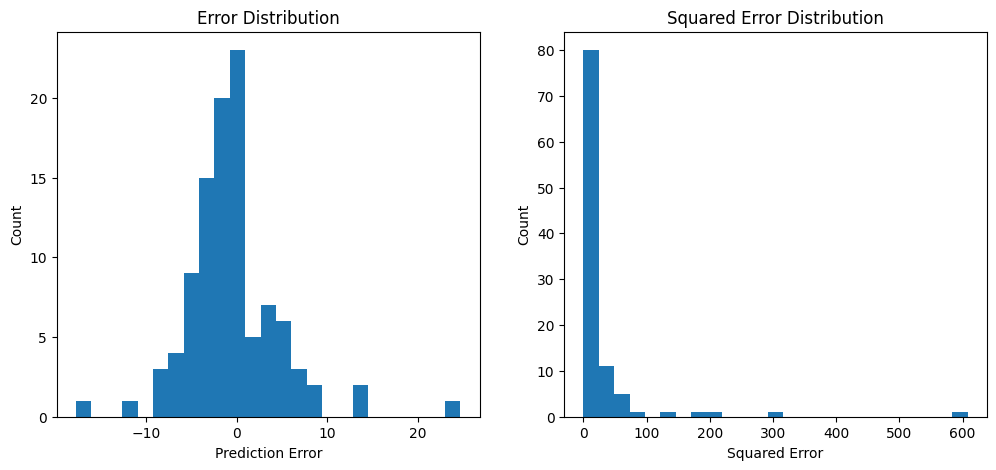

In [3]:
import matplotlib.pyplot as plt

# plots of error distribution
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.hist(error, bins=25)
ax1.set_xlabel("Prediction Error")
ax1.set_ylabel("Count")
ax1.set_title("Error Distribution")
ax2.hist(squared_error, bins=25)
ax2.set_xlabel("Squared Error")
ax2.set_ylabel("Count")
ax2.set_title("Squared Error Distribution")
plt.show()

# RMSE — Root Mean Squared Error

In [4]:
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 5.190839262539162


# RMSLE — Root Mean Squared Logarithmic Error

In [5]:
from sklearn.metrics import mean_squared_log_error
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print("RMSLE:", rmsle)

RMSLE: 0.23939203402357004


# MAE — Mean Absolute Error

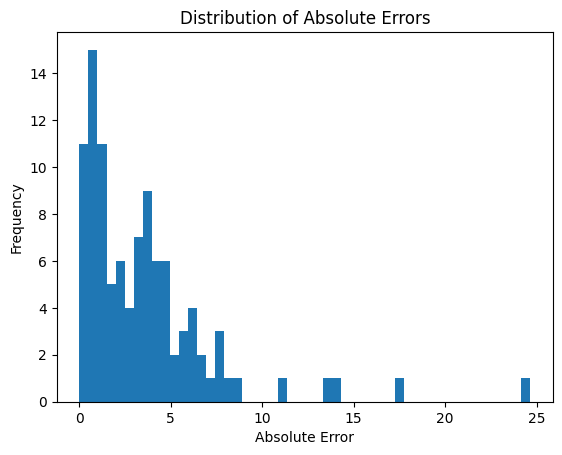

In [6]:
# the distribution of absolute errors
error = np.abs(y_test - y_pred)
plt.hist(error, bins=50)
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title('Distribution of Absolute Errors')
plt.show()

# MAPE — Mean Absolute Percentage Error

In [7]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE: %.3f' % mape)

MAPE: 0.180


# MPHE — Mean Pseudo Huber Error

In [8]:
delta = 1.5
mphe = np.mean(delta**2 * (np.sqrt(1 + ((y_test - y_pred)/delta)**2) - 1))
print("MPHE:", mphe)

MPHE: 3.9016393785777157


# R² — R Squared

In [9]:
# R-squared manually
r2_manual = 1 - (sum((y_test - y_pred)**2) / ((len(y_test) - 1) * np.var(y_test, ddof=1)))
# we use ddof=1, because we use sample variance, not population variance.

print("R-squared (manual):", r2_manual)
#R-squared (manual): 0.6859495577055563

# R-sqaured Sklearn
from sklearn.metrics import r2_score
r2_sklearn = r2_score(y_test, y_pred)
print("R-squared (sklearn):", r2_sklearn)

R-squared (manual): 0.6859495577055564
R-squared (sklearn): 0.6859495577055565


In [10]:
from sklearn.metrics import r2_score
n = X_train.shape[0]
p = X_train.shape[1]
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Adjusted R-squared:",adj_r2)

Adjusted R-squared: 0.6754812096290751


# EVS — Explained Variance Score

In [11]:
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred)
print('Explained Variance Score: %.3f' % evs)

Explained Variance Score: 0.689


In [12]:
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# BINARY -

# load breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
X_bi_train, X_bi_test, y_bi_train, y_bi_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train logistic regression model
model_bi = LogisticRegression()
model_bi.fit(X_bi_train, y_bi_train)

# predictions
y_bi_pred = model_bi.predict(X_bi_test)

# MULTICLASS -

# load iris dataset
data = load_iris()
X, y = data.data, data.target
X_mul_train, X_mul_test, y_mul_train, y_mul_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train logistic regression model
model_mul = LogisticRegression(multi_class="multinomial", solver="lbfgs")
model_mul.fit(X_mul_train, y_mul_train)

# predictions
y_mul_pred = model_mul.predict(X_mul_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# Confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix

cm_bi = confusion_matrix(y_bi_test, y_bi_pred)
print("Confusion Matrix for Binary Clf:\n", cm_bi)

cm_mul = confusion_matrix(y_mul_test, y_mul_pred)
print("Confusion Matrix for Multi Clf:\n", cm_mul)

Confusion Matrix for Binary Clf:
 [[40  3]
 [ 1 70]]
Confusion Matrix for Multi Clf:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Accuracy


In [14]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_bi_test, y_bi_pred)
print("Accuracy Bi Clf:", acc)

acc = accuracy_score(y_mul_test, y_mul_pred)
print("Accuracy Multi Clf:", acc)

Accuracy Bi Clf: 0.9649122807017544
Accuracy Multi Clf: 1.0


# Precision

In [15]:
from sklearn.metrics import precision_score

precision = precision_score(y_bi_test, y_bi_pred)
print("Precision Bi Clf:", precision)
precision = precision_score(y_mul_test, y_mul_pred, average='weighted')
print("Precision Multi Clf:", precision)

Precision Bi Clf: 0.958904109589041
Precision Multi Clf: 1.0


# Recall (Sensitivity)

In [16]:
from sklearn.metrics import recall_score

recall = recall_score(y_bi_test, y_bi_pred)
print("Recall Bi Clf:", recall)
recall = recall_score(y_mul_test, y_mul_pred, average='macro')
print("Recall Multi Clf:", recall)

Recall Bi Clf: 0.9859154929577465
Recall Multi Clf: 1.0


# Specificity

In [17]:
tn, fp, fn, tp = confusion_matrix(y_bi_test, y_bi_pred).ravel()
specificity = tn / (tn + fp)
print("Specificity Bi Clf: ", specificity)

Specificity Bi Clf:  0.9302325581395349


# Negative Predictive Value

In [18]:
cm = confusion_matrix(y_bi_test, y_bi_pred)
tn, fp, fn, tp = cm.ravel()
npv = tn / (tn + fn)
print("Negative predictive value Bi Clf:", npv)

Negative predictive value Bi Clf: 0.975609756097561


# Miss Rate

In [19]:
cm = confusion_matrix(y_bi_test, y_bi_pred)
tn, fp, fn, tp = cm.ravel()
miss_rate = fn / (fn + tp)
print("Miss Rate Bi Clf:", miss_rate)

Miss Rate Bi Clf: 0.014084507042253521


# Fall-Out

In [20]:
cm = confusion_matrix(y_bi_test, y_bi_pred)
tn, fp, fn, tp = cm.ravel()
fall_out_rate = fp / (fp + tn)
print("Fall Out Rate Bi Clf:", fall_out_rate)

Fall Out Rate Bi Clf: 0.06976744186046512


# F1 Score

In [21]:
from sklearn.metrics import f1_score
f1_bi = f1_score(y_bi_test, y_bi_pred, average='weighted')
print("F1 Score Bi Clf: ", f1_bi)
f1_mul = f1_score(y_mul_test, y_mul_pred, average='weighted')
print("F1 Score Mul Clf: ", f1_mul)

F1 Score Bi Clf:  0.9647382344750767
F1 Score Mul Clf:  1.0


# ROC & AUC

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


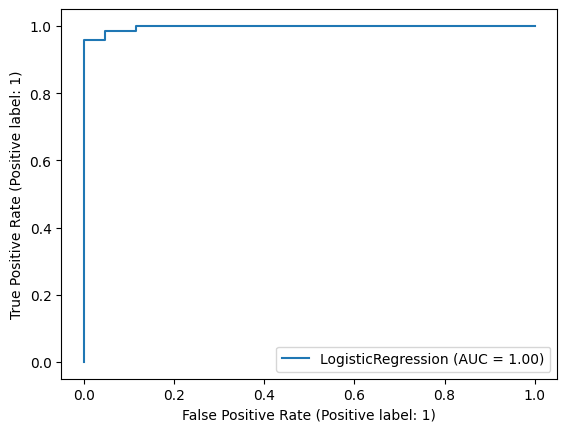

In [22]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model_bi, X_bi_test, y_bi_test)
plt.show()

# Log-Loss

In [23]:
from sklearn.metrics import log_loss
loss = log_loss(y_bi_test, y_bi_pred)
print("Log Loss: ", loss)

Log Loss:  1.2119079330871352
